In [98]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('music_data/train.csv')
df.head()

,SongLength,NumInstruments,Genre,Tempo,LyricalContent,ReleasedYear,Popularity
0,234.369261,4,Classical,84.774424,0.152603,2009,13.636534
1,343.876324,6,Jazz,65.486515,0.408796,1980,42.910689
2,305.973959,1,Jazz,164.752829,0.318433,1981,48.790880
3,158.897558,4,Pop,186.565004,0.680595,1984,68.362001
4,294.279271,4,Country,140.615871,0.969931,2015,86.969489


In [99]:
result = df.shape
print(result) # 8000 records 7 colums 

df.isnull().sum() # data null of null values

(8000, 7)


SongLength        0
NumInstruments    0
Genre             0
Tempo             0
LyricalContent    0
ReleasedYear      0
Popularity        0
dtype: int64

In [100]:
# Get unique genres
unique_genres = df['Genre'].unique() 

# Print the unique genres
print(unique_genres)

# hot encode categorical data 
df = pd.get_dummies(df, columns=['Genre'])

# Check the DataFrame columns after one-hot encoding
print("DataFrame columns after one-hot encoding:")
print(df.columns.tolist())

['Classical' 'Jazz' 'Pop' 'Country' 'Rap' 'Rock']
DataFrame columns after one-hot encoding:
['SongLength', 'NumInstruments', 'Tempo', 'LyricalContent', 'ReleasedYear', 'Popularity', 'Genre_Classical', 'Genre_Country', 'Genre_Jazz', 'Genre_Pop', 'Genre_Rap', 'Genre_Rock']


In [101]:
# Check the DataFrame columns after one-hot encoding
print("DataFrame columns after one-hot encoding:")
print(df.columns.tolist())

DataFrame columns after one-hot encoding:
['SongLength', 'NumInstruments', 'Tempo', 'LyricalContent', 'ReleasedYear', 'Popularity', 'Genre_Classical', 'Genre_Country', 'Genre_Jazz', 'Genre_Pop', 'Genre_Rap', 'Genre_Rock']


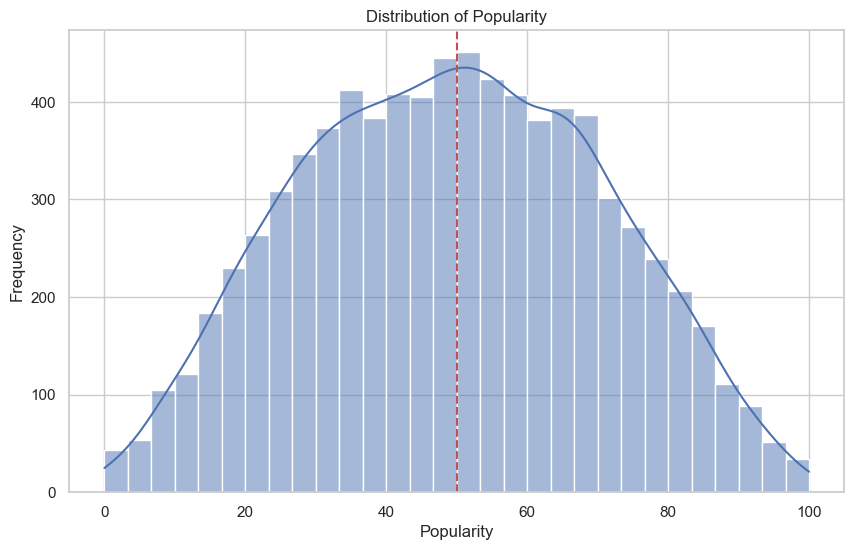

In [102]:
threshold = 50



# Plot the histogram of the Popularity column
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=30, kde=True)  # KDE adds a density plot
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.axvline(x=threshold, color='r', linestyle='--')  # Optional: add a line for your threshold
plt.show()

In [103]:


#identify features and target
X_cols = ['SongLength', 'NumInstruments', 'Tempo', 'LyricalContent', 'ReleasedYear',
          'Genre_Classical', 'Genre_Jazz', 'Genre_Pop', 'Genre_Country', 'Genre_Rap', 'Genre_Rock']

X = df[X_cols]
y = df['Popularity']

print(y.head())
print(y.dtype)


0    13.636534
1    42.910689
2    48.790880
3    68.362001
4    86.969489
Name: Popularity, dtype: float64
float64


In [104]:
# Define a threshold based on your analysis or visualization
threshold = 50  # Example threshold, adjust based on your dataset
df['Popularity'] = (df['Popularity'] > threshold).astype(int)  # Convert to binary

# Now redefine y after binarization
y = df['Popularity']


In [105]:

#instantiate model
model = LogisticRegression(max_iter=3300)

#train the model
model.fit(X, y)

coefficients = model.coef_[0]
intercept = model.intercept_[0]

print("Popularity = ", end="")
for i, coef in enumerate(coefficients):
    print(f"({coef.round(3)} * {X_cols[i]}) + ", end="")
    print(f"({intercept.round(3)})")

Popularity = (0.007 * SongLength) + (45.472)
(0.087 * NumInstruments) + (45.472)
(0.067 * Tempo) + (45.472)
(16.764 * LyricalContent) + (45.472)
(-0.032 * ReleasedYear) + (45.472)
(-0.207 * Genre_Classical) + (45.472)
(-0.14 * Genre_Jazz) + (45.472)
(0.236 * Genre_Pop) + (45.472)
(0.044 * Genre_Country) + (45.472)
(0.013 * Genre_Rap) + (45.472)
(0.121 * Genre_Rock) + (45.472)


In [106]:
# Get predicted popularity scores
probabilities = model.predict_proba(X)

# Convert to DF
prob_df=pd.DataFrame(probabilities, columns=['Pop 0','Pop 1'])
prob_df.head(10)

,Pop 0,Pop 1
0,0.999943,0.000057
1,0.992070,0.007930
2,0.609012,0.390988
3,0.001340,0.998660
4,0.000295,0.999705
5,0.061449,0.938551
6,0.999195,0.000805
7,0.999201,0.000799
8,0.000067,0.999933
9,0.999931,0.000069


In [107]:
# predict scores

X_test = df[X_cols]

pred = model.predict(X_test)

df_pred = pd.DataFrame({'Predicted': pred})
pd.concat([df, df_pred], axis=1).head(10)

,SongLength,NumInstruments,Tempo,LyricalContent,ReleasedYear,Popularity,Genre_Classical,Genre_Country,Genre_Jazz,Genre_Pop,Genre_Rap,Genre_Rock,Predicted
0,234.369261,4,84.774424,0.152603,2009,0,True,False,False,False,False,False,0
1,343.876324,6,65.486515,0.408796,1980,0,False,False,True,False,False,False,0
2,305.973959,1,164.752829,0.318433,1981,0,False,False,True,False,False,False,0
3,158.897558,4,186.565004,0.680595,1984,1,False,False,False,True,False,False,1
4,294.279271,4,140.615871,0.969931,2015,1,False,True,False,False,False,False,1
5,211.865745,3,174.926816,0.563496,2021,1,False,False,False,False,True,False,1
6,186.768370,2,99.281856,0.266840,2003,0,False,False,True,False,False,False,0
7,310.694353,6,129.716442,0.044765,1988,0,False,False,True,False,False,False,0
8,267.451080,6,191.067332,0.878952,2020,1,False,False,True,False,False,False,1
9,170.337195,3,118.744283,0.015339,1986,0,True,False,False,False,False,False,0


In [108]:
accuracy = model.score(X, y)
print("Accuracy:", accuracy)

Accuracy: 0.931625


In [109]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

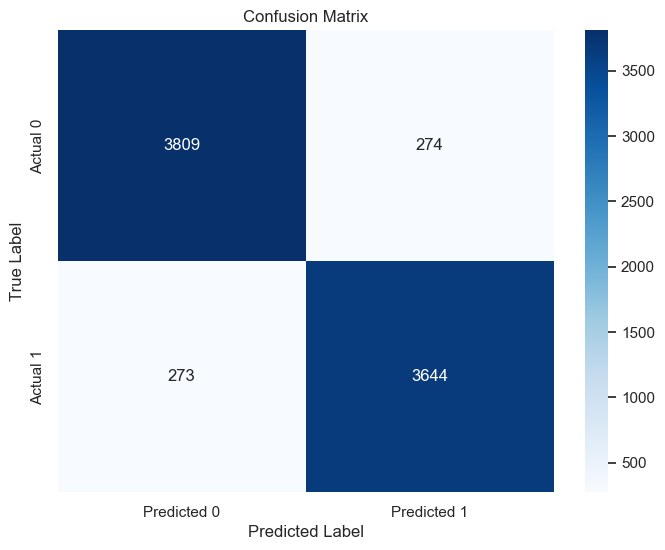

In [110]:
# Confusion matrix

cm = confusion_matrix(y, pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()